In [117]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import Imputer 
import collections
import statistics
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
import sklearn.metrics as metrics 
import seaborn as sns

PART I : Data Preparation 

In [118]:
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

In [119]:
print(train.shape)
print(test.shape)
#test.head(5)

(307511, 122)
(48744, 121)


In [120]:
train.dtypes.value_counts() # we have 16 objects, which are string vectors 

float64    65
int64      41
object     16
dtype: int64

In [121]:
train_X = train.iloc[:,train.columns!='TARGET']

In [122]:
train['TARGET'].value_counts() #the data is imbalanced 

0    282686
1     24825
Name: TARGET, dtype: int64

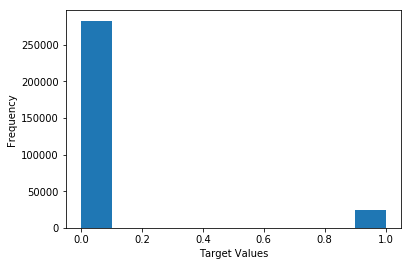

In [123]:
train['TARGET'].astype(int).plot.hist()
plt.xlabel("Target Values")
plt.show()

In [124]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
          # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
    
    
    

In [125]:
missing_train = missing_values_table(train)
missing_test= missing_values_table(test)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.
Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


In [126]:
col_missing_train = missing_train.index
col_missing_test = missing_test.index

In [127]:
df_missing_train  = train[col_missing_train]
df_missing_test  = train[col_missing_test]
object_columns_train = df_missing_train.columns[df_missing_train.dtypes=='object']
object_columns_test = df_missing_test.columns[df_missing_test.dtypes=='object']

In [128]:
#Replace the NaN using forward filling for object columns 
train_missing_categorical = train[object_columns_train]
test_missing_categorical = test[object_columns_test]
train_missing_categorical = train_missing_categorical.fillna(method='ffill')
test_missing_categorical = test_missing_categorical.fillna(method='ffill')

In [129]:
train[object_columns_train] = train_missing_categorical
test[object_columns_test] = test_missing_categorical
train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
print(train.shape)
print(test.shape)

(307511, 122)
(48744, 121)


In [131]:
#Replace the NaN  with mode for float columns 
float_columns = train.columns[train.dtypes=='float64']

train[float_columns] = train[float_columns].fillna(dict((train[float_columns]).mode(axis=0).iloc[0,:]))
test[float_columns] = test[float_columns].fillna(dict((test[float_columns]).mode(axis=0).iloc[0,:]))

In [132]:
encoder = LabelEncoder()
for col in train:
    if train[col].dtypes == 'object':
        if len(list(train[col].unique())) <= 2:
            encoder.fit(train[col])
            train[col] = encoder.transform(train[col])
            test[col] = encoder.transform(test[col])

In [133]:
#One-Hot Encoding 
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [134]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,1,0,0,0,0,0,0,0,1,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,1,0,0,0,0,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,1,0,0,1,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,1,0,0,1,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,1,0,0,1,0,0,0,0,0,0


In [135]:
print(train.shape)
print(test.shape)

(307511, 242)
(48744, 238)


In [136]:
target = train['TARGET']

In [137]:
train = train[test.columns]
train['TARGET'] = target

In [138]:
train.shape

(307511, 239)

In [139]:
#Standarlize the numerical predictors 
train.iloc[:,1:238] = StandardScaler().fit_transform(X = train.iloc[:,1:238].values)
test.iloc[:,1:] = StandardScaler().fit_transform(X = test.iloc[:,1:].values) 
train_id = train.iloc[:,0]
test_id = test.iloc[:,0]

In [140]:
print(train.shape)
print(test.shape)

(307511, 239)
(48744, 238)


In [141]:
#PCA for dimension reduction 
pca = PCA(n_components=40,random_state=2019)

In [142]:
principle_compnents_train = pca.fit_transform(train.iloc[:,1:238])
principle_compnents_test = pca.fit_transform(test.iloc[:,1:])

In [143]:
labels = []
for i in (np.arange(40)+1):
    l = "PC " + str(i)
    labels.append(l)
labels.append("SK_ID_CURR")
labels.append("TARGET")

In [144]:
principalDf_train = pd.DataFrame(data = principle_compnents_train)
principalDf_train['SK_ID_CURR'] = train['SK_ID_CURR']
principalDf_train['TARGET'] = train['TARGET']
principalDf_test = pd.DataFrame(data = principle_compnents_test)
principalDf_test['SK_ID_CURR'] = test['SK_ID_CURR']
principalDf_train.columns = list(labels)
principalDf_test.columns = list(labels[0:41])

In [145]:
principalDf_train.head(5)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 33,PC 34,PC 35,PC 36,PC 37,PC 38,PC 39,PC 40,SK_ID_CURR,TARGET
0,-3.233361,0.756338,3.769747,1.164075,2.466300,-1.295498,1.098404,0.313083,4.115431,2.638593,...,0.320188,-1.089729,-0.804770,-0.381146,1.195691,0.401131,-0.241040,1.308834,100002,1
1,1.377547,1.059836,-3.337477,3.359428,-0.244018,1.340437,-3.337816,-0.535335,0.689629,-1.034979,...,-1.262872,-0.216115,-0.422562,-0.127860,0.028546,0.502521,0.592593,-0.795007,100003,0
2,-2.004045,0.487175,-0.049242,-1.723995,1.695130,-1.912098,1.687251,-0.440383,-0.191518,0.374863,...,-0.973247,-0.261511,-0.488692,0.395771,-0.325673,-0.022973,1.141156,0.814990,100004,0
3,-1.923763,0.000518,-0.049711,-0.794415,0.959159,-0.467470,-0.777243,-0.375523,0.607953,0.156316,...,-0.482514,-2.451983,1.122848,0.419053,0.162358,0.256758,-0.573969,0.199493,100006,0
4,-2.048751,0.993304,-0.695738,-0.574502,0.443183,-1.935644,2.181222,-0.524860,-0.601729,-1.439235,...,-0.982740,-1.177286,2.084239,-1.783523,-0.629077,1.354099,6.700847,5.304456,100007,0


In [146]:
#Over-sampling 
os2 = SMOTE(random_state=2019)
os_data_X,os_data_y=os2.fit_sample(principalDf_train.iloc[:,0:41], principalDf_train['TARGET'])
os_data_X = pd.DataFrame(data=os_data_X,columns=labels[0:41] )

In [147]:
os_data_X['SK_ID_CURR'] = os_data_X['SK_ID_CURR'].astype(object)

In [148]:
train_X = os_data_X
train_Y = os_data_y
#pd.Series(train_Y).value_counts

In [149]:
train_Y.sum()/len(train_Y) #The data is balanced now 
#Train_test split 
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=2019)

PART II: Baseline 

In [150]:
#Lofistic regression 
lg = LogisticRegression(C=2)
lg.fit(X_train.iloc[:,0:40],y_train)


/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
predicted = lg.predict(X_test.iloc[:,0:40])
probs1 = (lg.predict_proba(X_test.iloc[:,0:40]))[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs1)
roc_auc1 = metrics.auc(fpr, tpr) #auc = 0.71 
roc_auc1

0.7066195732787819

In [152]:
print(classification_report(y_test, predicted)) #f1-score = 0.64


              precision    recall  f1-score   support

           0       0.66      0.64      0.65     56403
           1       0.65      0.67      0.66     56672

   micro avg       0.66      0.66      0.66    113075
   macro avg       0.66      0.66      0.66    113075
weighted avg       0.66      0.66      0.66    113075



In [153]:
#Random Forest 
rf = RandomForestClassifier(n_estimators=20, random_state=2019 )
rf.fit(X_train.iloc[:,0:40],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)

In [154]:
predicted2 = rf.predict(X_test.iloc[:,0:40])
probs2 = rf.predict_proba(X_test.iloc[:,0:40])[:,1]
fpr2, tpr2, threshold = metrics.roc_curve(y_test,probs2)
auc2 = metrics.auc(fpr2,tpr2)
print(auc2)   #auc= 0.96
accuracy_score(y_test, predicted2) #accuracy = 0.90

0.9629786080299381


0.9025337165598054

In [155]:
print(classification_report(y_test, predicted2))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     56403
           1       0.91      0.90      0.90     56672

   micro avg       0.90      0.90      0.90    113075
   macro avg       0.90      0.90      0.90    113075
weighted avg       0.90      0.90      0.90    113075



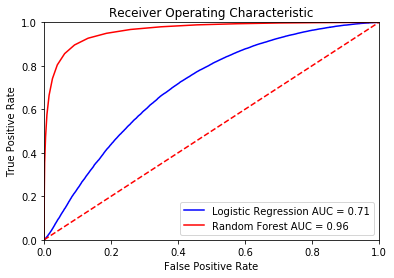

In [156]:
#ROC-plot function
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Logistic Regression AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r',label = 'Random Forest AUC = %0.2f' % auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() #ROC-plot shows that Random Forest Performs much better than logistic regression.

PART III: Advanced Model

In [157]:
#Add bureau as our new feature 
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [158]:
loan_counts = bureau.groupby('SK_ID_CURR',as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})

loan_counts.head(5)

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [159]:
train_new = train.merge(loan_counts,on="SK_ID_CURR",how="left")
test_new = test.merge(loan_counts,on="SK_ID_CURR",how="left")
train_new['previous_loan_counts'] = train_new['previous_loan_counts'].fillna(0)
test_new['previous_loan_counts'] = test_new['previous_loan_counts'].fillna(0)

/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


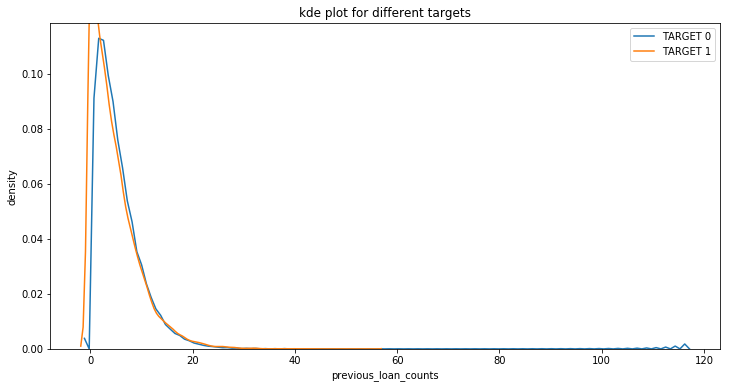

In [160]:
plt.figure(figsize = (12, 6))

sns.kdeplot(train_new.loc[train_new['TARGET']==0,'previous_loan_counts'],label="TARGET 0")
sns.kdeplot(train_new.loc[train_new['TARGET']==1, 'previous_loan_counts'],label="TARGET 1")
plt.xlabel("previous_loan_counts")
plt.ylabel("density")
plt.title("kde plot for different targets")
plt.show()  #It seems that there is no obvious relationship between loan counts and target values, but I'll keep it 

In [161]:
bureau_agg = bureau.drop(['SK_ID_BUREAU'],axis=1).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                 ...    DAYS_CREDIT_UPDATE                               \
  mean max min   ...                 count        mean  max   min   sum   
0  0.0   0   0   ...                     7  -93.142857   -6  -155  -652   
1  0.0   0   0   ...                     8 -499.875000   -7 -1185 -3999   
2  0.0   0   0   ...                     4 -816.000000  -43 -2131 -3264   
3  0.0   0   0   ...                     2 -532.000000 -382  -682 -1064   
4  0.0   0   0   ...                     3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      NaN  
3           0          NaN      NaN  NaN      NaN  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

In [162]:
columns = ['SK_ID_CURR']


for var in bureau_agg.columns.levels[0]:
    
    if var != 'SK_ID_CURR':
        for stat in bureau_agg.columns.levels[1][:-1]:
            columns.append('bureau_%s_%s' % (var, stat))

In [163]:
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,NaN
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,NaN
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [164]:
train_new = train_new.merge(bureau_agg,on="SK_ID_CURR",how="left")
test_new = test_new.merge(bureau_agg,on="SK_ID_CURR",how="left")
train_new.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,-0.324395,-0.717914,0.664531,-0.577538,0.142129,-0.478095,-0.166096,-0.507236,-0.149452,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,-0.324395,-0.717914,-1.504820,-0.577538,0.426792,1.725450,0.592708,1.600873,-1.252750,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,NaN
2,100004,3.082659,1.392925,0.664531,-0.577538,-0.427196,-1.152888,-1.404584,-1.092145,-0.783451,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,NaN
3,100006,-0.324395,-0.717914,0.664531,-0.577538,-0.142533,-0.711430,0.177912,-0.653463,-0.928991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,-0.324395,-0.717914,0.664531,-0.577538,-0.199466,-0.213734,-0.361695,-0.068554,0.563570,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,NaN


In [165]:
train_new = train_new.fillna(0)
test_new = test_new.fillna(0)
np.sum(np.sum(train_new.isnull()))

0

In [166]:
train_new.shape
test_new.shape

(48744, 299)

In [167]:
299-61

238

In [168]:
#Standarlize the added predictors 
train_new.iloc[:,239:] = StandardScaler().fit_transform(X = train_new.iloc[:,239:].values)
test_new.iloc[:,238:] = StandardScaler().fit_transform(X = test_new.iloc[:,238:].values)

In [170]:
t = train_new['TARGET']
train_new = train_new.drop(['TARGET'],axis=1)
train_new['TARGET'] = t
train_new.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum,TARGET
0,100002,-0.324395,-0.717914,0.664531,-0.577538,0.142129,-0.478095,-0.166096,-0.507236,-0.149452,...,-0.068226,0.348421,-0.154980,-0.305655,2.322585,-0.047866,-0.03447,-0.03727,-0.052514,1
1,100003,-0.324395,-0.717914,-1.504820,-0.577538,0.426792,1.725450,0.592708,1.600873,-1.252750,...,-0.753088,0.238210,-1.003670,-0.108751,-0.428551,-0.047866,-0.03447,-0.03727,-0.052514,0
2,100004,3.082659,1.392925,0.664531,-0.577538,-0.427196,-1.152888,-1.404584,-1.092145,-0.783451,...,-0.137823,-0.799612,0.296279,0.480619,-0.428551,-0.047866,-0.03447,-0.03727,-0.052514,0
3,100006,-0.324395,-0.717914,0.664531,-0.577538,-0.142533,-0.711430,0.177912,-0.653463,-0.928991,...,1.014716,0.369851,0.908125,0.765660,-0.428551,-0.047866,-0.03447,-0.03727,-0.052514,0
4,100007,-0.324395,-0.717914,0.664531,-0.577538,-0.199466,-0.213734,-0.361695,-0.068554,0.563570,...,-0.681596,-2.027243,0.205668,0.555898,-0.428551,-0.047866,-0.03447,-0.03727,-0.052514,0


In [180]:
#PCA for dimesion reduction 
print(train_X.shape)
print(test_new.shape)
train_X.head()

(452297, 299)
(48744, 299)


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
487845,373240,-0.324395,1.392925,0.664531,-0.577538,0.176981,-0.844767,-0.824777,-0.822301,-0.883416,...,-0.392580,0.545953,0.298470,0.378553,0.591761,0.377512,0.336168,0.092957,0.626831,0.254616
361288,357800,-0.324395,1.392925,0.171398,4.772551,-0.194282,-0.821433,-0.565753,-0.793032,-0.657512,...,-0.786843,0.997335,0.346334,0.900622,0.762811,-0.249870,-0.032498,-0.029219,-0.011487,-0.044320
441921,253655,-0.324395,0.751232,0.005050,0.807273,-0.200225,0.068740,0.475475,0.063051,-0.529262,...,-0.992199,1.006155,0.357753,0.904580,0.764602,-0.428551,-0.047866,-0.034470,-0.037270,-0.052514
429948,421404,-0.324395,-0.717914,-1.076842,1.918883,-0.237421,-0.773219,-0.873919,-0.787836,-0.062511,...,0.494041,0.187011,0.347172,-0.244413,-0.028509,0.833381,0.074974,0.010037,0.116568,0.078474
118580,237510,-0.324395,-0.717914,-1.504820,-0.577538,-0.484129,-0.613635,-0.945701,-0.787505,-1.150157,...,-0.392580,-0.219425,0.311684,0.133897,0.307826,-0.428551,-0.047866,-0.034470,-0.037270,-0.052514


In [176]:
#Over-sampling 
os3 = SMOTE(random_state=2019)
label = train_new.columns[0:299]
os_data_X,os_data_y=os3.fit_sample(train_new.iloc[:,0:299], train_new.iloc[:,299])
os_data_X = pd.DataFrame(data=os_data_X,columns=label )
os_data_X['SK_ID_CURR'] = os_data_X['SK_ID_CURR'].astype('object')

In [178]:
train_X,test_X,train_y, test_y = train_test_split(os_data_X,os_data_y,test_size=0.2, random_state=2019)

In [190]:
#Random Forest Classfier 
rf3 = RandomForestClassifier(n_estimators=20, random_state=2019)
rf3.fit(train_X.iloc[:,1:],train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)

In [192]:
pred3 = rf3.predict(test_X.iloc[:,1:])
pred_prob = rf3.predict_proba(test_X.iloc[:,1:])[:,1]
accuracy_score(test_y,pred3) #aacuracy=0.96

0.9560645589210701

In [193]:
fpr3,tpr3,threshold = metrics.roc_curve(test_y,pred_prob)
metrics.auc(fpr3,tpr3) #auc becomes 0.97, the best model 

0.9732947064391405

PART IV: Predict the True Test DataSet and Save 

In [196]:
predict_final = rf3.predict(test_new.iloc[:,1:])